# Regression Model

## Importing Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset into the tool

In [2]:
data=pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Let's know the shape of the data

In [3]:
data.shape

(4177, 9)

### One additional task is that, we have to add the "Age" column using "Rings" data. We just have to add '1.5' to the ring data

In [4]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Perform Below Visualizations.

## (i) Univariate Analysis

### Histogram

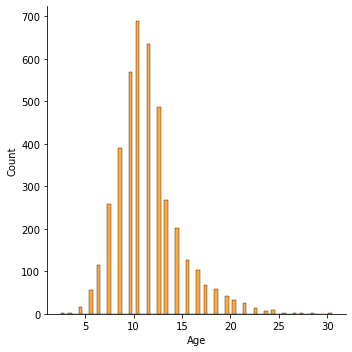

In [5]:
sns.displot(data["Age"], color='darkorange')

<AxesSubplot:xlabel='Count', ylabel='Age'>

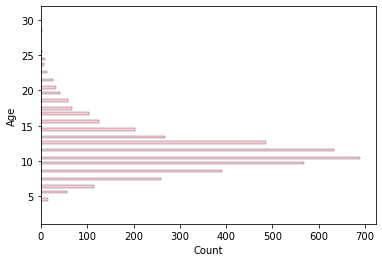

In [6]:
sns.histplot(y=data.Age,color='pink') 

<AxesSubplot:xlabel='Age', ylabel='Count'>

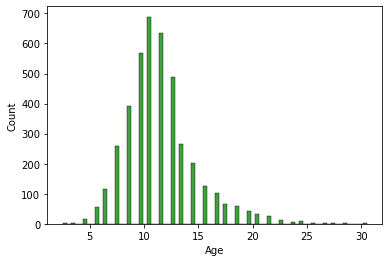

In [7]:
sns.histplot(x=data.Age,color='green') 

### Boxplot

<AxesSubplot:xlabel='Age'>

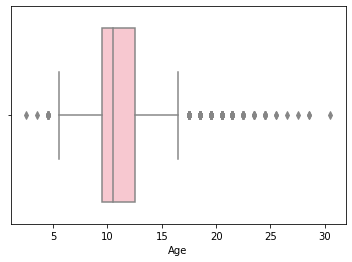

In [8]:
sns.boxplot(x=data.Age,color='pink') 

### Countplot

<AxesSubplot:xlabel='Age', ylabel='count'>

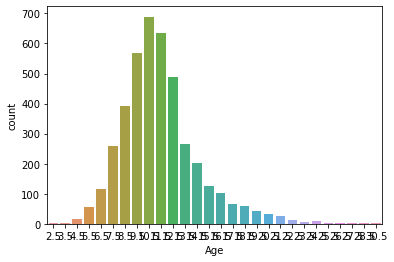

In [9]:
sns.countplot(x=data.Age) 

## (ii) Bi-Variate Analysis

### Barplot

<AxesSubplot:xlabel='Height', ylabel='Age'>

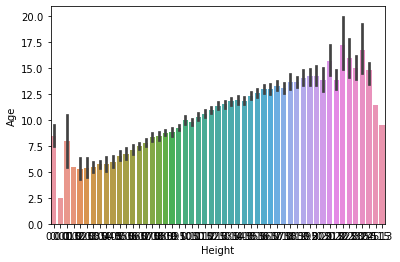

In [10]:
sns.barplot(x=data.Height,y=data.Age)

### Linearplot

<AxesSubplot:xlabel='Age', ylabel='Height'>

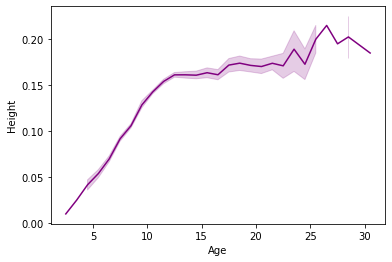

In [11]:
sns.lineplot(x=data.Age,y=data.Height, color='purple')

### Scatterplot

<AxesSubplot:xlabel='Age', ylabel='Height'>

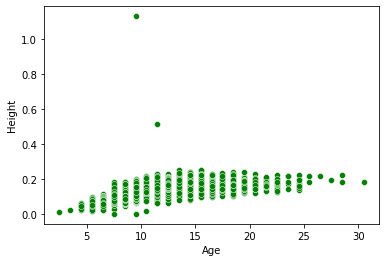

In [12]:
sns.scatterplot(x=data.Age,y=data.Height,color='green')

### Pointplot

In [ ]:
sns.pointplot(x=data.Age, y=data.Height, color="blue") 

### Regplot

In [ ]:
sns.regplot(x=data.Age,y=data.Height,color='orange') 

## (iii) Multi-Variate Analysis

### Pairplot

In [ ]:
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight"]])

## Perform descriptive statistics on the dataset

In [ ]:
data.describe(include='all')

## Check for Missing values and deal with them

In [ ]:
data.isnull().sum()

## Find the outliers and replace them outliers

In [ ]:
outliers=data.quantile(q=(0.25,0.75))
outliers

In [ ]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

In [ ]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

## Check for Categorical columns and perform encoding

In [ ]:
data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)

data.head()

## Split the data into dependent and independent variables

In [ ]:
y = data["Sex"]
y.head()

In [ ]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

## Scale the independent variables

In [ ]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

## Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [ ]:
X_Train.shape,X_Test.shape

In [ ]:
Y_Train.shape,Y_Test.shape

In [ ]:
X_Train.head()

In [ ]:
X_Test.head()

In [ ]:
Y_Train.head()

In [ ]:
Y_Test.head()

## Build the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
model.fit(X_Train,Y_Train)

In [ ]:
y_predict = model.predict(X_Test)

In [ ]:
y_predict_train = model.predict(X_Train)

## Train the Model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

## Test the Model

In [ ]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

## Measure the performance using Metrics

In [ ]:
pd.crosstab(Y_Test,y_predict)

In [ ]:
print(classification_report(Y_Test,y_predict))